<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0CLHEN3536-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Beat CNN with Vision Transformers for Image Classification**

Estimated time needed: **60** minutes


Image classification refers to the task of assigning a label or a category to an input image based on its visual content. It involves training a model to recognize and differentiate between different objects, scenes, or patterns within images.

Vision Transformers (ViTs) are an exciting development in the field of computer vision, leveraging the Transformer architecture initially designed for natural language processing. The introduction of Transformers revolutionized NLP by effectively capturing long-range dependencies and achieving exceptional performance on tasks like machine translation and language understanding.
Now, this transformative architecture has been successfully applied to image classification tasks, yielding promising outcomes that often surpass the capabilities of traditional Convolutional Neural Networks (CNNs). This recent advancement in image classification using ViTs has created a significant buzz in the field. It is essential to familiarize yourself with the concept and knowledge surrounding ViTs in order to fully exploit their potential and stay up to date with the latest developments in this rapidly evolving domain.
The Vision Transformer is a model  treats images as sequences of smaller patches, like a sentence we assume that part of the images are related. We show in the image by <a href=https://github.com/lucidrains/vit-pytorch/blob/main/images/vit.gif>Phil Wang</a> , an image is divided into 9 patches. Each patch is considered a "word" or "token" and is transformed into a feature space. By adding positional encodings and a classification token, we can use a Transformer model to train on this sequence for image classification. Below is a GIF that visualizes the architecture.


<img src=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/vit.gif />


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Background---Vision-Transformers">Background - Vision Transformers</a>
        <ol>
            <li><a href="#What-is-self-attention?">What is self-attention?</a></li>
        </ol>
    </li>
    <li><a href="#Loading-MNIST-dataset">Loading MNIST dataset</a></li>
    <li><a href="#Images-as-Sequences">Images as Sequences</a></li>
    <li><a href="#Constructing-Vision-Transformer-Model">Constructing Vision Transformer Model</a></li>
    <li><a href="#Loading-Pre-trained-model">Loading Pre-trained model</a></li>
    <li><a href="#Output-for-the-model">Output for the model</a></li>
</ol>


---


# Objectives

After completing this lab you will be able to:

- PyTorch: In this guided project, you will work with the PyTorch library to build and train a vision transformer specifically for image classification tasks. By leveraging the power of PyTorch, you will develop an efficient and accurate model to classify images effectively.
- Vision Transformers: You will explore the concept of vision transformers to enhance the efficiency and accuracy of your image classification system. Additionally, you will learn about their implementation to further refine the model.


# Setup


For this lab, we will be using the following libraries:

*   [numpy](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical and array operations.
*   [sklearn](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [torchvision](https://pytorch.org/vision/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX05WUEN3552-2023-01-01) for deep learning and neural network-related functions.
*   [torch](https://pytorch.org/docs/stable/torch.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX05WUEN3552-2023-01-01) for multi-dimensional tensors and mathematical operations over tensors.
*   [matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [PIL](https://pillow.readthedocs.io/en/stable/handbook/concepts.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX05WUEN3552-2023-01-01) for loading images.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [1]:
pip install skillsnetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.9 MB/s eta 0:00:00


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# - Update a specific package
!pip install pmdarima -U
# - Update a package to specific version
# !pip install --upgrade pmdarima==2.0.2
# Note: If your environment doesn't support "!pip install", use "!mamba install"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.0 MB/s eta 0:00:00


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import os
from PIL import Image
import numpy as np
## Imports for plotting
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torchvision.utils import make_grid
import torch.nn as nn
from torchvision import transforms
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
from tqdm import tqdm

import skillsnetwork
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import ExponentialLR

**NOTE** - Upgrade scikit-learn version by using the below command and restart the kernel.


In [4]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


### Defining Helper Functions

Plot randomly selected samples from a dataset.


In [5]:
def plot_samples(dataset, size_even=6, classes=None):

    size_even = 6  # Default number of samples to plot
    dataset = train_set  # Default dataset to use (assuming 'train_set')
    fig, axs = plt.subplots(2, int(size_even // 2))  # Create subplots for the samples

    if classes is None:
        classes = tuple([n for n in range(len(dataset))])  # Default class labels

    n_samples = len(dataset)  # Total number of samples in the dataset

    # Randomly select samples
    samples = np.random.randint(0, high=n_samples - 1, size=int(size_even))

    row = 0
    col = 0
    for n, sample in enumerate(samples):
        img = dataset[sample][0]  # Get the image from the dataset
        label = "y={}".format(classes[int(dataset[sample][1])])  # Get the label for the image

        col = n

        # Determine the row and column index for the current sample
        if n > size_even / 2 - 1:
            row = 1
            col = n - int(size_even / 2)

        # Display the image and label in the corresponding subplot
        axs[row, col].imshow(make_grid(img, normalize=True).permute(1, 2, 0))
        axs[row, col].set_title(label)
        axs[row, col].axis('off')

 Plot a grid of image patches.


In [6]:
def plot_image_patchs(patchs, seq=False):

    if patchs.shape[-3] == 1:
        patchs = patchs.repeat(1, 1, 3, 1, 1)  # Add 3 channel dimension if image is grayscale

    N_patchs = patchs.shape[1]  # Number of image patches

    plot_patchs = make_grid(patchs, normalize=True).permute(0, 2, 3, 1)  # Arrange patches for plotting

    N_rows = int(np.sqrt(N_patchs))  # Number of rows for the grid plot

    # Create subplots for the image patches
    if seq:
        fig, ax = plt.subplots(1, N_rows * N_rows, sharex='col', sharey='row', figsize=(25, 5))
        fig.suptitle("Image as Sequence")
    else:
        fig, ax = plt.subplots(N_rows, N_rows, sharex='col', sharey='row')
        fig.suptitle("Image")

    i, j = 0, 0
    for n in range(N_patchs):
        if seq:
            ax[n].imshow(plot_patchs[n])
            ax[n].set_xlabel(str(n + 1))
            ax[n].axes.xaxis.set_ticklabels([])
            ax[n].axes.yaxis.set_ticklabels([])
        else:
            if n % N_rows == 0 and n != 0:
                i += 1
                j = 0

            ax[i, j].imshow(plot_patchs[n])
            ax[i, j].set_ylabel(str(n + 1))
            ax[i, j].axes.xaxis.set_ticklabels([])
            ax[i, j].axes.yaxis.set_ticklabels([])
            j += 1

    plt.show()


The code implements a function for plotting t-SNE visualization of patches and their labels, with the option to label each point and control the frequency of labeling for the sequence index.


In [7]:
def plot_patchs_lables(X, y, label=True, p_show=0.5):
    '''
    The code implements a function for plotting t-SNE visualization of patches and their labels, with the option to label each point and control
    the frequency of labeling for the sequence index.

    X: This is a tensor representing the data to be plotted. It should have the shape (sample, patch, dim), where sample is the number of samples, patch is the size of each patch or sequence length, and dim is the number of features for each patch.
    y: This is a tensor representing the labels for each sample. It should have the shape (sample, 1).
    label: This is a boolean value that controls whether to label each data point in the plot. If label is set to True, each data point in the plot will be labeled.
    p_show: This is a float value between 0 and 1 that controls the frequency of labeling for the sequence index. It specifies the probability of showing a label for each data point. For example, if p_show is set to 0.5, then approximately half of the data points will be labeled.
    '''

    # Detach X from its computational graph if it's not a leaf node
    if not (X.is_leaf):
        X = X.detach()

    # Get the shape of the input tensor X
    if X.shape[0] == 49:
        sample = X.shape[1]
        patch = X.shape[0]  # Patch size or sequence length
        dim = X.shape[2]
    if X.shape[0] == 1000:
        sample = X.shape[0]
        patch = X.shape[1]
        dim = X.shape[2]

    # Reshape X and convert it to a numpy array
    X = X.reshape(sample * patch, dim).numpy()

    # Flatten the y tensor and convert it to a numpy array to label each sequence
    colors = y.repeat(patch, 1).T.flatten().numpy()

    # Perform t-SNE on the X data
    X_ = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

    # Create a scatter plot of the t-SNE transformed X data with each class labeled via color
    fig, ax = plt.subplots()
    for color in np.unique(colors):
        temp = colors == color
        ax.scatter(X_[temp, 0], X_[temp, 1], label=color)

    # If the label argument is set to True, add labels to the scatter plot
    if label:
        for i, x in enumerate(X_):
            # Label plots with a probability of p_show
            if np.random.binomial(1, p_show, 1).item() == 1:
                ax.annotate(str(i % patch), (x[0], x[1]))

    # Add a legend to the scatter plot
    ax.legend()

Convert an image into a set of vectors.


In [8]:
def img_to_patch(x, patch_size, flatten_channels=True):

    B, C, H, W = x.shape
    x = x.reshape(B, C, H//patch_size, patch_size, W//patch_size, patch_size)
    x = x.permute(0, 2, 4, 1, 3, 5) # [B, H', W', C, p_H, p_W]
    x = x.flatten(1,2)              # [B, H'*W', C, p_H, p_W]
    if flatten_channels:
        x = x.flatten(2,4)          # [B, H'*W', C*p_H*p_W]
    return x

---


## Background - Vision Transformers

Vision Transformers are a groundbreaking deep learning architecture that brings the power of the Transformer model, initially developed for natural language processing (NLP), into computer vision. They have completely transformed how image recognition is approached by substituting the conventional convolutional neural networks (CNNs) with **self-attention mechanisms**. This upgrade enables Vision Transformers to process visual data in a highly efficient and parallelized manner. Notably, Vision Transformers have outperformed traditional CNN-based methods, setting new standards in object detection, image classification, and segmentation tasks. Their exceptional performance on various benchmarks highlights their effectiveness and potential in the field of computer vision.


### What is self-attention?

In Vision Transformers, the entire image is divided into smaller sections called patches. These patches are similar to pieces of a puzzle that come together to form the complete picture. What's fascinating is that each patch has the ability to "look at" and consider all the other patches in the image. It pays attention to their features and tries to comprehend how they are connected to each other. This global attention mechanism allows the model to analyze the image as a whole and capture the relationships between distant regions.

Vision Transformers begin by focusing on local patches and gradually expand their understanding to encompass the broader context. This unique capability of capturing both local and global relationships is what sets them apart. They can effectively learn from various parts of the image and gain insight into how these parts fit together.


---


## Loading MNIST dataset
The MNIST dataset is an extensively utilized benchmark in machine learning and computer vision and is  is a widely used benchmark dataset for image classification tasks. It comprises a vast collection of 70,000 handwritten digits ranging from 0 to 9. Each digit is represented as a grayscale image with dimensions of 28x28 pixels. The MNIST dataset acts as a standard for evaluating and comparing algorithms and models for tasks such as image classification. Its simplicity and accessibility have made it a go-to option for beginners to delve into and grasp various machine learning techniques. For more information on the MNIST dataset, you can visit [here](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0CLHEN3536-2023-01-01#torchvision.datasets.MNIST). We would like to classify the digit given the image of the digit.


***Normalization*** refers to the process of adjusting the intensity values of image pixels to a specific range. One common approach is to scale the pixel values to fall within the range of [0, 1]. Another approach is standardization, which brings the pixel values to a range of [-1, 1].

**Why do we use Normalization?**

***Normalization*** serves multiple purposes in data preprocessing for machine learning tasks. It helps prevent certain features from dominating the training process and can aid in reducing computational costs. By bringing the pixel values to a similar scale, normalization facilitates the convergence of models and contributes to more accurate results.


In [9]:
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_TEST = 1000

transform_mnist = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))])

train_set = torchvision.datasets.MNIST(root='.',train=True, download=True,
                                       transform=transform_mnist)

test_set = torchvision.datasets.MNIST(root='.',train=False, download=True,
                                      transform=transform_mnist)

100%|██████████| 9912422/9912422 [00:00<00:00, 108518203.72it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 7661966.72it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28494698.97it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16338360.86it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In the torchvision library, the **`DataLoader`** class is used to create an iterable over a dataset. It provides various features to efficiently load and preprocess data for training or inference in PyTorch.

It can be used to create batches, shuffle these batches, multi-threading and data prefetching. Read more about [**DataLoader**](https://pytorch.org/vision/stable/datasets.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX05WUEN3552-2023-01-01)


In [10]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE_TEST, shuffle=True)

## Images as Sequences


The first line creates an iterator **`it`** from the **`test_loader`** data loader. The iterator allows us to iterate over the test dataset in batches, enabling us to access and process the data in a sequential manner.

The second line retrieves the next batch of data from the iterator using the **`next()`** function. By accessing the element at index 0, it retrieves the input images from the batch. In this case, it fetches the input image from the first batch of the test dataset.


In [11]:
it=iter(test_loader)
image=next(it)[0]

In this code, **```image```** is assumed to be a tensor, and **```B, C, H```** and **```W```** represent the batch size, number of channels, height, and width respectively.


In [12]:
B, C, H, W = image.shape
print("batch size: {}, number of channels: {}, height: {},  width: {}".format( B, C, H, W ))

batch size: 1000, number of channels: 1, height: 28,  width: 28


The image itself represents the last two dimensions.


In [13]:
image[0][0].shape

torch.Size([28, 28])

Plotting the image.


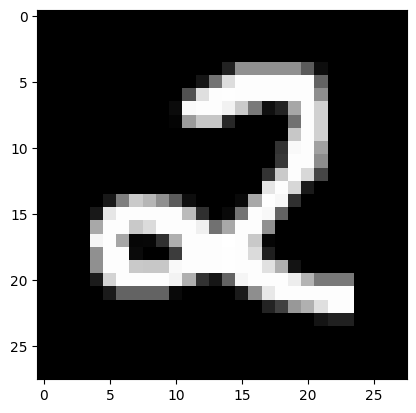

In [14]:
plt.imshow(image[0][0].numpy(),cmap="gray")
plt.show()

To split the image into patches, we will use a patch size of 4. The number of batches can be determined by dividing the size of the image by the patch size and squaring the result, assuming that the patches form a square shape.


In [15]:
patch_size=4

n_patches=(H/patch_size)* (W/patch_size)
n_patches

49.0

We have the option to convert the image into a set of patches. In this case, when **`flatten_channels`** is set to **`False`**, the patches are arranged in an image grid format instead of flattening the channels. This arrangement enables us to visualize the patches as a grid and use them as a feature vector for further analysis or application.


In [16]:
patches=img_to_patch(torch.unsqueeze(test_set[1][0],0), patch_size, flatten_channels=False)

We have the batch dimension, which represents the number of images in a batch. Additionally, we have the number of patches, which corresponds to the patches extracted from each image. For color images, we also have the color channel dimension, representing the RGB channels. Each image patch contains the pixel information for a specific region of the image.


In [17]:
patches.shape

torch.Size([1, 49, 1, 4, 4])

We can plot the image as a patch, preserving its original shape.


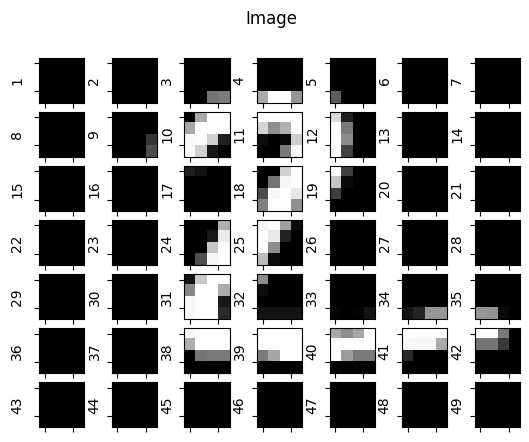

In [18]:
plot_image_patchs(patches)

We will see the image as a sequence.


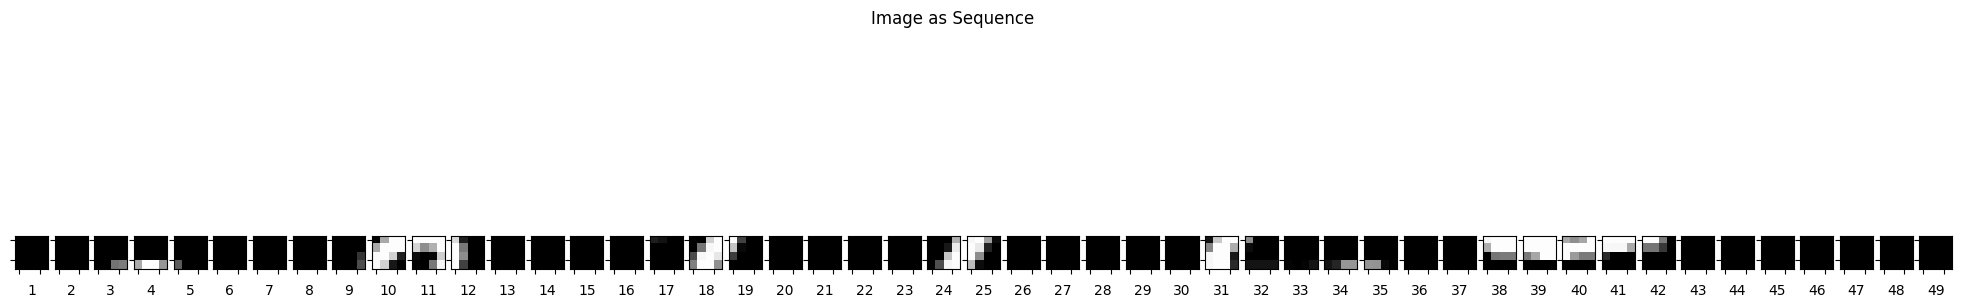

In [19]:
plot_image_patchs(patches, seq=True)

When compared to the original images, the patch lists present a greater challenge for object recognition. The input format provided to the Transformer for image classification consists of these individual patches. In this format, the model needs to learn how to effectively combine these patches to recognize the objects within the image.


### Exercise 1 - Use the function **```img_to_patch```** convert the image to sequence set **```flatten_channels=True```** and find the shape


<details>
    <summary>Click here for a Hint</summary>
```python
patchs=img_to_patch(torch.unsqueeze(test_set[1][0],0), patch_size, flatten_channels=True)
```
</details>


### Exercise 2 - What does the Dimensions of each Patch mean?


<details>
    <summary>Click here for a Hint</summary>
```

Batch Dimension: The first dimension represents the batch size, indicating the number of patches or images within a batch. It allows for processing multiple patches simultaneously.

Sequence Dimension: The second dimension represents the sequence length or patch size. It signifies the number of elements or pixels within each patch. In other words, it captures the spatial extent of the patches.

Feature Dimension: The final dimension corresponds to the features or channels within the patches. For example, in the case of color images, this dimension represents the RGB channels. In the case of grayscale images, this dimension may represent the intensity or other image features. It captures additional information or characteristics of the patches.
```
</details>


---


## Constructing Vision Transformer Model


We will now construct a Transformer model specifically designed for image-related tasks, utilizing the **`nn.MultiheadAttention`** module provided by PyTorch.

Additionally, we adopt the Pre-Layer Normalization version of Transformer blocks, proposed by Ruibin Xiong et al. in 2020. This variant places Layer Normalization as the first layer within the residual blocks, deviating from the traditional approach of applying it between residual blocks. This reorganization improves gradient flow and eliminates the need for a warm-up stage.

The AttentionBlock class comprises several components:

- **`layer_norm_1`**: nn.LayerNorm (PyTorch Documentation)
- **`attn`**: nn.MultiheadAttention (PyTorch Documentation)
- **`layer_norm_2`**: nn.LayerNorm (PyTorch Documentation)
- **`linear`**: nn.Sequential (PyTorch Documentation)

These components collaborate to form the attention block within the Transformer model, functioning similarly to a convolutional layer in a CNN.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/transformer_Layer%20.png" width="30%" alt="cheques image">


Since we will be using multiple Attention Blocks in our Transformer model, we will create a dedicated class to conveniently configure each block. This class allows us to specify the dimensions and number of attention heads for individual blocks.

The class supports the following parameters:

- **`embed_dim`**: This parameter determines the size of the input and attention feature vectors.
- **`hidden_dim`**: It defines the dimensionality of the hidden layer in the feed-forward network. Typically, it is chosen to be 2-4 times larger than embed_dim.
- **`num_heads`**: We can select the number of attention heads to be utilized in the Multi-Head Attention block. This facilitates parallel processing and captures various attention patterns.
By instantiating this class with different parameter values, we can easily customize each Attention Block within our Transformer model to suit our specific requirements.

This approach offers flexibility for experimentation with various configurations, aiding in the identification of optimal settings for our task.

Feel free to modify these parameters and explore the possibilities to achieve the best performance for your application!


In [20]:
class AttentionBlock(nn.Module):

    def __init__(self, embed_dim, hidden_dim, num_heads, dropout=0.0):
        """
        Inputs:
            embed_dim - Dimensionality of input and attention feature vectors
            hidden_dim - Dimensionality of hidden layer in feed-forward network
                         (usually 2-4x larger than embed_dim)
            num_heads - Number of heads to use in the Multi-Head Attention block
            dropout - Amount of dropout to apply in the feed-forward network
            #source:https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial15/Vision_Transformer.html
        """
        super().__init__()

        self.layer_norm_1 = nn.LayerNorm(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, num_heads,
                                          dropout=dropout)
        self.layer_norm_2 = nn.LayerNorm(embed_dim)
        self.linear = nn.Sequential(
            nn.Linear(embed_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, embed_dim),
            nn.Dropout(dropout)
        )


    def forward(self, x):
        inp_x = self.layer_norm_1(x)
        x = x + self.attn(inp_x, inp_x, inp_x)[0]
        x = x + self.linear(self.layer_norm_2(x))
        return x

The VisionTransformer is utilized for image classification and follows a set of steps to process the input image:

1. **Preprocessing**: The img_to_patch function divides the input image into patches.
2. **Input Encoding**: The patches pass through an input layer, generating feature vectors.
3. **Positional Encoding**: The feature vectors incorporate positional embeddings and a CLS token, capturing spatial information.
4. **Transformer Blocks**: Multiple Transformer blocks process the feature vectors and positional embeddings, employing self-attention mechanisms to capture patch dependencies and extract meaningful representations.
5. **Classification Prediction**: The output from the Transformer blocks enters an MLP head, responsible for the final classification prediction.

The VisionTransformer class encapsulates the necessary layers and parameters to construct and execute this model.

Please note that the code may reference additional functions and classes, such as AttentionBlock and img_to_patch, which handle specific operations within the model.


In [21]:
class VisionTransformer(nn.Module):

    def __init__(self, embed_dim, hidden_dim, num_channels, num_heads, num_layers, num_classes, patch_size, num_patches, dropout=0.0):
        """
        Inputs:
            embed_dim - Dimensionality of the input feature vectors to the Transformer
            hidden_dim - Dimensionality of the hidden layer in the feed-forward networks
                         within the Transformer
            num_channels - Number of channels of the input (3 for RGB)
            num_heads - Number of heads to use in the Multi-Head Attention block
            num_layers - Number of layers to use in the Transformer
            num_classes - Number of classes to predict
            patch_size - Number of pixels that the patches have per dimension
            num_patches - Maximum number of patches an image can have
            dropout - Amount of dropout to apply in the feed-forward network and
                      on the input encoding
             #source:https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial15/Vision_Transformer.html
        """
        super().__init__()

        self.patch_size = patch_size

        # Layers/Networks
        self.input_layer = nn.Linear(num_channels*(patch_size**2), embed_dim)
        self.transformer = nn.Sequential(*[AttentionBlock(embed_dim, hidden_dim, num_heads, dropout=dropout) for _ in range(num_layers)])
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(embed_dim),
            nn.Linear(embed_dim, num_classes)
        )
        self.dropout = nn.Dropout(dropout)

        # Parameters/Embeddings
        self.cls_token = nn.Parameter(torch.randn(1,1,embed_dim))
        self.pos_embedding = nn.Parameter(torch.randn(1,1+num_patches,embed_dim))
        print(num_patches)


    def forward(self, x):
        # Preprocess input
        x = img_to_patch(x, self.patch_size)
        B, T, _ = x.shape
        x = self.input_layer(x)

        # Add CLS token and positional encoding
        cls_token = self.cls_token.repeat(B, 1, 1)
        x = torch.cat([cls_token, x], dim=1)

        x = x + self.pos_embedding[:,:T+1]

        # Apply Transforrmer
        x = self.dropout(x)
        x = x.transpose(0, 1)
        x = self.transformer(x)

        # Perform classification prediction
        cls = x[0]
        out = self.mlp_head(cls)
        return out

### Train Model


To create a VisionTransformer object, we utilize values similar to "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale."
Here's a breakdown of what each parameter represents:

- <code>embed_dim</code>: This parameter determines the dimensionality of the embedded feature representation of each patch in the image. In this case, it is set to 256.
- <code>hidden_dim</code>: It represents the dimensionality of the hidden layer in the model. The hidden layer contains intermediate representations and computations. Here, it is set to 512.
- <code>num_heads</code>: This parameter specifies the number of attention heads in the self-attention mechanism. Each head attends to different parts of the input, allowing the model to capture different types of relationships. In this case, there are 8 attention heads.
- <code>num_layers</code>: It indicates the number of transformer layers in the VisionTransformer model. Each layer processes the input sequentially, refining the representations. Here, there are 6 transformer layers.
- <code>patch_size</code>: It represents the size of each patch extracted from the input image. In this case, patches are square and have a size of 4x4 pixels.
- <code>num_channels</code>: This parameter denotes the number of channels in the input image. For grayscale images, like in this case, the number of channels is 1.
- <code>num_patches</code>: It indicates the total number of patches that make up the image. This value is calculated based on the image size and patch size. Here, there are 64 patches.
- <code>num_classes</code>: This parameter specifies the number of classes in the classification task. In this case, the model is designed for a classification problem with 10 classes.
- <code>dropout</code>: It represents the dropout rate, which is a regularization technique used to prevent overfitting. Dropout randomly sets a fraction of the input units to 0 during training. Here, the dropout rate is set to 0.2, meaning 20% of the input units will be zeroed out during training.


In [22]:
embed_dim= 256
hidden_dim=512
num_heads= 8
num_layers=6
patch_size=4
num_channels=1
num_patches=64
num_classes=10
dropout=0.2
model=VisionTransformer( embed_dim= embed_dim, hidden_dim=hidden_dim, num_channels=num_channels, num_heads=num_heads, num_layers=num_layers, num_classes=num_classes, patch_size=patch_size, num_patches=num_patches, dropout=dropout)

64


In [23]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
device

device(type='cpu')

The learning rate scheduler is a feature provided by the PyTorch library. It allows for the adjustment of the learning rate of an optimizer at specific intervals or epochs during the training process.

- <code>criterion</code>: This variable represents the loss function used for the optimization process. In our case, the nn.CrossEntropyLoss() function is used, which is commonly employed for multi-class classification tasks.
- <code>optimizer</code>: This variable represents the optimizer used to update the model's parameters during the training process. The optim.AdamW() function is used here, which is an extension of the Adam optimizer with weight decay regularization.
- <code>scheduler</code>: This variable represents the learning rate scheduler, which adjusts the learning rate of the optimizer during training. In the given code snippet, an ExponentialLR scheduler is used.

During training, you can update the learning rate by calling the step() method of the scheduler at the end of each epoch.


In [24]:
lr=3e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = ExponentialLR(optimizer, gamma=0.9)

As this method is computationally intensive, we will provide you with the model.

__Even 1 epoch for training takes long time.__ You can __skip the training__ here and import the pre-trained model following the instruction below.


In [25]:
'''
useful_stuff = {'training_loss': [], 'validation_accuracy': []}
correct_old=0

for epoch in tqdm(range(100)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        model.train()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    scheduler.step()
    useful_stuff['training_loss'].append(running_loss)
    correct = 0
    model.eval()

    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      z = model(inputs)
      _, yhat = torch.max(z, 1)
      correct += (yhat == labels).sum().item()
      if correct>correct_old:
          correct_old=correct

    useful_stuff['validation_accuracy'].append(correct_old/len(test_set))
print('Finished Training')
'''

"\nuseful_stuff = {'training_loss': [], 'validation_accuracy': []}\ncorrect_old=0\n\nfor epoch in tqdm(range(100)):  # loop over the dataset multiple times\n\n    running_loss = 0.0\n    for i, data in enumerate(train_loader):\n        # get the inputs; data is a list of [inputs, labels]\n        inputs, labels = data[0].to(device), data[1].to(device)\n\n        # zero the parameter gradients\n        optimizer.zero_grad()\n\n        # forward + backward + optimize\n        model.train()\n        outputs = model(inputs)\n\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        # print statistics\n        running_loss += loss.item()\n\n        if i % 2000 == 1999:    # print every 2000 mini-batches\n            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')\n            running_loss = 0.0\n    scheduler.step()\n    useful_stuff['training_loss'].append(running_loss)\n    correct = 0\n    model.eval()\n\n    for inputs,

### Loading Pre-trained model

Training a Vision Transformer Model can be a time-consuming process. If our goal is to evaluate the performance of a fully trained and optimized model, it becomes necessary to do it for a big number of epochs.

Therefore, in order to expedite the training process and avoid excessively long training times for this lab, we will simplify the procedure by providing you with the option to download the pre-trained parameters of the Vision Transformers. By utilizing these pre-trained parameters, you will be able to obtain a pre-trained model, which can be directly employed to generate images.


In [29]:
dataset_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/gray_5_blocks_v2.pt"
await skillsnetwork.prepare(dataset_url, overwrite=True)

  0%|          | 0/82 [00:00<?, ?it/s]

Saved to '.'


Load the pre-trained model:


In [30]:
model.load_state_dict(torch.load('gray_5_blocks_v2.pt',map_location=device))
model.eval()

VisionTransformer(
  (input_layer): Linear(in_features=16, out_features=256, bias=True)
  (transformer): Sequential(
    (0): AttentionBlock(
      (layer_norm_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (layer_norm_2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (linear): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): GELU(approximate='none')
        (2): Dropout(p=0.2, inplace=False)
        (3): Linear(in_features=512, out_features=256, bias=True)
        (4): Dropout(p=0.2, inplace=False)
      )
    )
    (1): AttentionBlock(
      (layer_norm_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (layer_norm_2): Layer

The first line creates an iterator **`it`** from the **`test_loader`** data loader. The iterator allows us to iterate over the test dataset in batches, enabling us to access and process the data in a sequential manner.

The second line retrieves the next batch of data from the iterator using the **`next()`** function and in this case, the retrieved batch contains both images and their corresponding labels.


In [31]:
it=iter(test_loader)
images= next(it)

This code is to capture the activation values of specific layers in the model during the forward pass. By using the custom activation hook and the activations list, the code enables the collection of activation values for further analysis or visualization.


In [32]:
number_samples = 100

# Create a random input tensor
input_tensor = images[0:number_samples][0]
input_labels = images[0:number_samples][1]

# Define a list to store the activation values
activations = []

# Define a custom activation hook function
def activation_hook(module, input, output):
    activations.append(output.detach())

In [33]:
# Iterate over all the modules in the network
for module in model.modules():
    # Register the activation hook to the desired layers
    if isinstance(module, nn.Linear):
        module.register_forward_hook(activation_hook)

with torch.no_grad():
    output = model(input_tensor)

The **<code>activations</code>** list stored above is used to store the activation values obtained from specific layers of the model. These **<code>activations</code>** are then passed as input to the **<code>plot_patchs_lables()</code>** function for visualization purposes.

The **<code>plot_patchs_lables()</code>** function creates a scatter plot where each data point represents an activation. The scatter plot assigns colors to the data points based on their corresponding class labels. Additionally, if the label parameter is set to <code>True</code>, the function annotates the scatter plot with the sequence index.

During the initial epochs of training, the scatter plot may exhibit dissonance, meaning that the activation values of different classes might be mixed together, making it difficult to discern clear boundaries or separations between the classes. This is expected since the model's parameters are still being adjusted and optimized.

However, as the training continues and more epochs are completed, the model learns to extract and represent distinct features that are relevant for distinguishing between different classes. This leads to a more organized scatter plot where the activation values of each class become more clustered and separated from the other classes. The distinct mapping refers to the clearer separation and grouping of the data points based on their class labels.


**NOTE**: The plotting takes around ~19 minutes per iteration, and there will be 6 iterations. Therefore, I am adding the images I have stored on my local disk. You can skip running the cell below.


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78b665664dc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


0


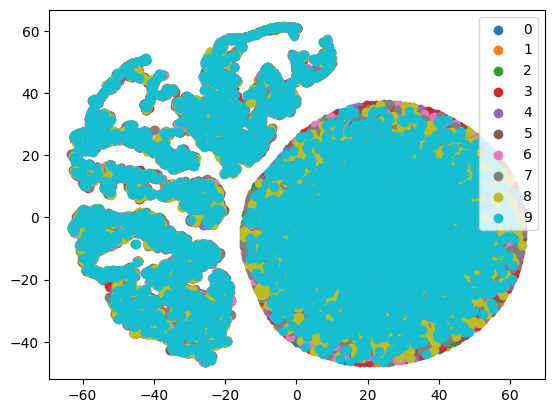

5


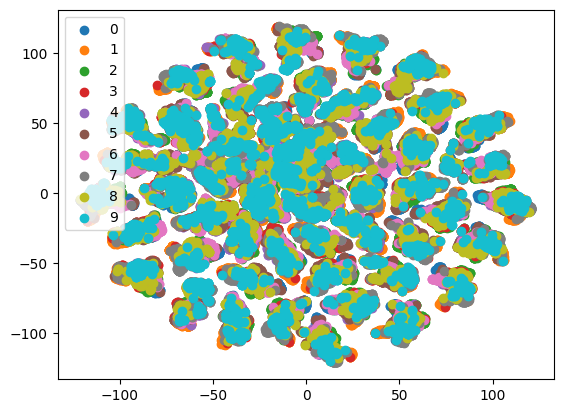

10


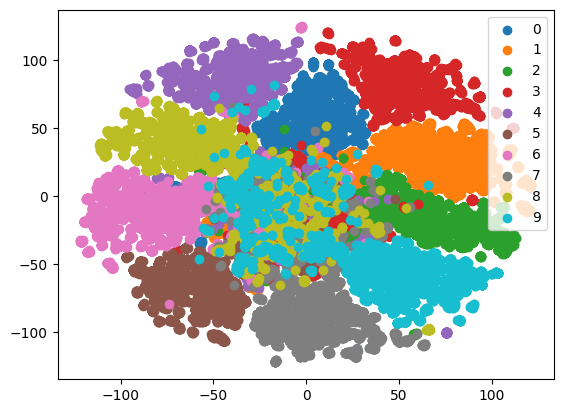

In [34]:
activation_new = 0
for i, activation in enumerate(activations):
    if activation.shape[-1] == 256:
        if activation.shape[0] != 1:
            activation_new = torch.permute(activation, (1, 0, 2))
        else:
            activation_new = activation

    if i % 5 == 0:
        print(i)
        plot_patchs_lables(activation_new, input_labels, label=True, p_show=0)
        plt.show()

| Iteration 1 | Iteration 2 |
|-------------|-------------|
| ![Iteration 1](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/first.png) | ![Iteration 2](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/second.png) |

| Iteration 3 | Iteration 4 |
|-------------|-------------|
| ![Iteration 3](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/third.png) | ![Iteration 4](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/forth.png) |

| Iteration 5 | Iteration 6 |
|-------------|-------------|
| ![Iteration 5](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/fifth.png) | ![Iteration 6](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/sixth.png) |

| Iteration 7 |
|-------------|
| ![Iteration 7](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0CLHEN/seventh.png) |


Again, the iterator is used to get images and labels


In [35]:
it=iter(test_loader)
images, labels= next(it)

## Output for the model

Lets classify the image using the output of the model

#### Softmax
Suppose we have a model that predicts the likelihood of three classes: Cat, Dog, and Bird. The model outputs raw scores for each class, indicating the model's confidence. Let's say the model's output raw scores for an input example are the input neural network:

$$\text{Raw scores} = [3.2, 2.1, 1.5]$$

To calculate the softmax probabilities, we apply the softmax function to these raw scores:

$$
\text{softmax}([3.2, 2.1, 1.5]) = \left[ \frac{e^{3.2}}{e^{3.2} + e^{2.1} + e^{1.5}}, \frac{e^{2.1}}{e^{3.2} + e^{2.1} + e^{1.5}}, \frac{e^{1.5}}{e^{3.2} + e^{2.1} + e^{1.5}} \right]
$$


Now, let's calculate the softmax values:

$$\text{softmax}([3.2, 2.1, 1.5]) ≈ [0.533, 0.278, 0.189]$$

**In our case, the same principle is applied to the MNIST dataset, where each class from 0 to 9 is assigned a probability value. The label with the highest probability value is selected as the predicted label.**


#### Argmax

The **<code>argmax()</code>** function is a mathematical function that returns the index of the maximum value in a tensor or array along a specified axis. In the context of the code snippet provided, **<code>argmax(dim=1)</code>** is used to find the index of the class with the highest probability for each image.


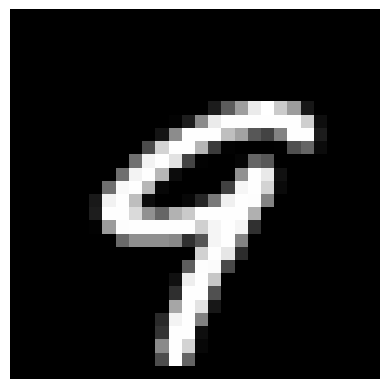

Predicted label: tensor(9)
Actual label: tensor(9)
Probabilities:
Class 0: 8.244807077062433e-07
Class 1: 9.619939334015726e-08
Class 2: 1.1884721651256314e-08
Class 3: 2.0748849749452347e-07
Class 4: 8.03627244749805e-08
Class 5: 1.4023250116679264e-07
Class 6: 2.830556899979797e-09
Class 7: 9.172374149102325e-08
Class 8: 6.678117614455914e-08
Class 9: 0.9999984502792358



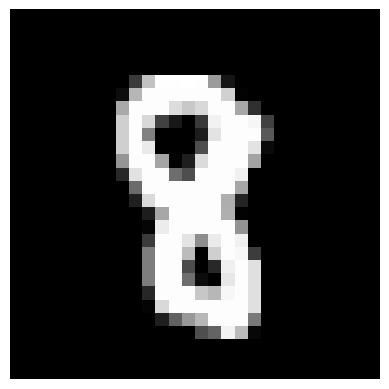

Predicted label: tensor(8)
Actual label: tensor(8)
Probabilities:
Class 0: 1.037330932263103e-07
Class 1: 7.443720306810064e-08
Class 2: 1.7331431934053398e-07
Class 3: 3.9500233128819673e-07
Class 4: 1.1157544577145018e-07
Class 5: 8.0558262283148e-09
Class 6: 1.4073728493713134e-07
Class 7: 1.1819060397044723e-08
Class 8: 0.9999953508377075
Class 9: 3.587187620723853e-06



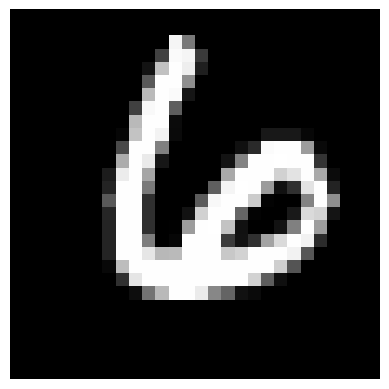

Predicted label: tensor(6)
Actual label: tensor(6)
Probabilities:
Class 0: 5.922137802372163e-07
Class 1: 2.2719547132510343e-08
Class 2: 9.804286804637741e-08
Class 3: 5.888369791762216e-09
Class 4: 4.927181862512953e-07
Class 5: 4.087907967686988e-08
Class 6: 0.9999983310699463
Class 7: 1.2042962183045347e-09
Class 8: 3.8182520256668795e-07
Class 9: 3.2413582928825235e-09



In [36]:
# Only 3 images are selected
images = images[:3]
labels = labels[:3]

p_yx = model(images)

# Get predicted probabilities
probabilities = F.softmax(p_yx, dim=1)

# Find predicted labels
predicted_labels = probabilities.argmax(dim=1)

# Compare predicted labels with actual labels and display the images
for i in range(len(images)):
    # Convert the image tensor to a numpy array
    image = images[i].squeeze().numpy()

    # Display the image in grayscale
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    print("Predicted label:", predicted_labels[i])
    print("Actual label:", labels[i])
    print("Probabilities:")

    # Print probabilities for each class
    for j in range(len(probabilities[i])):
        class_name = f"Class {j}"
        probability = probabilities[i][j].item()
        print(f"{class_name}: {probability}")

    print()

---


# Congratulations! You have completed the lab


## Authors


[Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0CLHEN3536-2023-01-01) has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### Contributor


[Roodra Kanwar](https://www.linkedin.com/in/roodrakanwar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0CLHEN3536-2023-01-01) is completing his MS in CS specializing in big data from Simon Fraser University. He has previous experience working with machine learning and as a data engineer.


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-07-26|0.1|Joseph|Created Lab Template|
|2023-07-28|0.1|Roodra|Edited & Reviewed Lab|


Copyright © 2023 IBM Corporation. All rights reserved.
